# Exploratory Data Analysis

In [33]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [34]:
# Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import seaborn as sns

In [35]:
data=pd.read_csv('data.csv',parse_dates=['timestamp'])

In [36]:
data.head()

,Unnamed: 0,flair,title,score,id,url,comms_num,body,author,comments,timestamp,combined_features
0,0,Business/Finance,Interest PF taxable: Finance minister eye PF i...,51,laoy5g,https://timesofindia.indiatimes.com/business/i...,20,NaN,satyasys,"PF return fully taxable, point investing PF. G...",2021-02-02 19:30:37,Interest PF taxable: Finance minister eye PF i...
1,1,Food,How survive 500rs(food) 2 weeks?,55,kr3ztg,https://www.reddit.com/r/india/comments/kr3ztg...,79,Hey guys. So time salary going late I'll recei...,Luc_90,"1. 2 kg cheap rice, 50/kg so, (Don't buy boile...",2021-01-06 07:40:59,How survive 500rs(food) 2 weeks?1. 2 kg cheap ...
2,2,Scheduled,"Right wing group labelling resource document ""...",143,lbwl1r,https://www.reddit.com/r/india/comments/lbwl1r...,17,"Recently Greta Thunberg tweeted ""toolkit"" peop...",gobargorab,Anything father modi make go crazy upset. That...,2021-02-04 09:27:18,"Right wing group labelling resource document ""..."
3,3,Food,Ask: What amount pocket money give children?,5,m0auzn,https://www.reddit.com/r/india/comments/m0auzn...,39,"Also, supposed buy pocket money actually spend...",what_is_inflation,You guy get pocket money? My parent never gave...,2021-03-08 21:25:43,Ask: What amount pocket money give children?Yo...
4,4,Photography,"I’ve Recently generated interest photography, ...",0,aaakn4,https://i.redd.it/9tcehs8vz0721.jpg,14,NaN,thesarcasticpage,A photo like letter viewer story want convey. ...,2018-12-29 03:35:37,"I’ve Recently generated interest photography, ..."


In [37]:
data.fillna(value='',inplace=True)

In [38]:
data.head()

,Unnamed: 0,flair,title,score,id,url,comms_num,body,author,comments,timestamp,combined_features
0,0,Business/Finance,Interest PF taxable: Finance minister eye PF i...,51,laoy5g,https://timesofindia.indiatimes.com/business/i...,20,,satyasys,"PF return fully taxable, point investing PF. G...",2021-02-02 19:30:37,Interest PF taxable: Finance minister eye PF i...
1,1,Food,How survive 500rs(food) 2 weeks?,55,kr3ztg,https://www.reddit.com/r/india/comments/kr3ztg...,79,Hey guys. So time salary going late I'll recei...,Luc_90,"1. 2 kg cheap rice, 50/kg so, (Don't buy boile...",2021-01-06 07:40:59,How survive 500rs(food) 2 weeks?1. 2 kg cheap ...
2,2,Scheduled,"Right wing group labelling resource document ""...",143,lbwl1r,https://www.reddit.com/r/india/comments/lbwl1r...,17,"Recently Greta Thunberg tweeted ""toolkit"" peop...",gobargorab,Anything father modi make go crazy upset. That...,2021-02-04 09:27:18,"Right wing group labelling resource document ""..."
3,3,Food,Ask: What amount pocket money give children?,5,m0auzn,https://www.reddit.com/r/india/comments/m0auzn...,39,"Also, supposed buy pocket money actually spend...",what_is_inflation,You guy get pocket money? My parent never gave...,2021-03-08 21:25:43,Ask: What amount pocket money give children?Yo...
4,4,Photography,"I’ve Recently generated interest photography, ...",0,aaakn4,https://i.redd.it/9tcehs8vz0721.jpg,14,,thesarcasticpage,A photo like letter viewer story want convey. ...,2018-12-29 03:35:37,"I’ve Recently generated interest photography, ..."


In [39]:
# What are the column names in our dataset

data.columns

Index(['Unnamed: 0', 'flair', 'title', 'score', 'id', 'url', 'comms_num',
       'body', 'author', 'comments', 'timestamp', 'combined_features'],
      dtype='object')

### We will drop id column as it is not an important feature in our data.

In [40]:
data.drop(['id'],axis=1,inplace=True)

In [41]:
data.shape

(2280, 11)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         2280 non-null   int64         
 1   flair              2280 non-null   object        
 2   title              2280 non-null   object        
 3   score              2280 non-null   int64         
 4   url                2280 non-null   object        
 5   comms_num          2280 non-null   int64         
 6   body               2280 non-null   object        
 7   author             2280 non-null   object        
 8   comments           2280 non-null   object        
 9   timestamp          2280 non-null   datetime64[ns]
 10  combined_features  2280 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 196.1+ KB


In [43]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [44]:
data.head()

,flair,title,score,url,comms_num,body,author,comments,timestamp,combined_features
0,Business/Finance,Interest PF taxable: Finance minister eye PF i...,51,https://timesofindia.indiatimes.com/business/i...,20,,satyasys,"PF return fully taxable, point investing PF. G...",2021-02-02 19:30:37,Interest PF taxable: Finance minister eye PF i...
1,Food,How survive 500rs(food) 2 weeks?,55,https://www.reddit.com/r/india/comments/kr3ztg...,79,Hey guys. So time salary going late I'll recei...,Luc_90,"1. 2 kg cheap rice, 50/kg so, (Don't buy boile...",2021-01-06 07:40:59,How survive 500rs(food) 2 weeks?1. 2 kg cheap ...
2,Scheduled,"Right wing group labelling resource document ""...",143,https://www.reddit.com/r/india/comments/lbwl1r...,17,"Recently Greta Thunberg tweeted ""toolkit"" peop...",gobargorab,Anything father modi make go crazy upset. That...,2021-02-04 09:27:18,"Right wing group labelling resource document ""..."
3,Food,Ask: What amount pocket money give children?,5,https://www.reddit.com/r/india/comments/m0auzn...,39,"Also, supposed buy pocket money actually spend...",what_is_inflation,You guy get pocket money? My parent never gave...,2021-03-08 21:25:43,Ask: What amount pocket money give children?Yo...
4,Photography,"I’ve Recently generated interest photography, ...",0,https://i.redd.it/9tcehs8vz0721.jpg,14,,thesarcasticpage,A photo like letter viewer story want convey. ...,2018-12-29 03:35:37,"I’ve Recently generated interest photography, ..."


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   flair              2280 non-null   object        
 1   title              2280 non-null   object        
 2   score              2280 non-null   int64         
 3   url                2280 non-null   object        
 4   comms_num          2280 non-null   int64         
 5   body               2280 non-null   object        
 6   author             2280 non-null   object        
 7   comments           2280 non-null   object        
 8   timestamp          2280 non-null   datetime64[ns]
 9   combined_features  2280 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 178.2+ KB


In [46]:
data.shape

(2280, 10)

In [47]:
# Total values for each flairs

data['flair'].value_counts()

Politics              244
Coronavirus           241
Food                  240
Scheduled             234
Business/Finance      230
AskIndia              226
Science/Technology    220
Photography           219
Policy/Economy        214
Non-Political         212
Name: flair, dtype: int64

In [48]:
x=pd.DataFrame(data['flair'].value_counts())
print(x.index)

Index(['Politics', 'Coronavirus', 'Food', 'Scheduled', 'Business/Finance',
       'AskIndia', 'Science/Technology', 'Photography', 'Policy/Economy',
       'Non-Political'],
      dtype='object')


In [49]:
x.columns

Index(['flair'], dtype='object')

## It is seen that Politics has the most number of posts, so it is the most trending topic.

<BarContainer object of 10 artists>

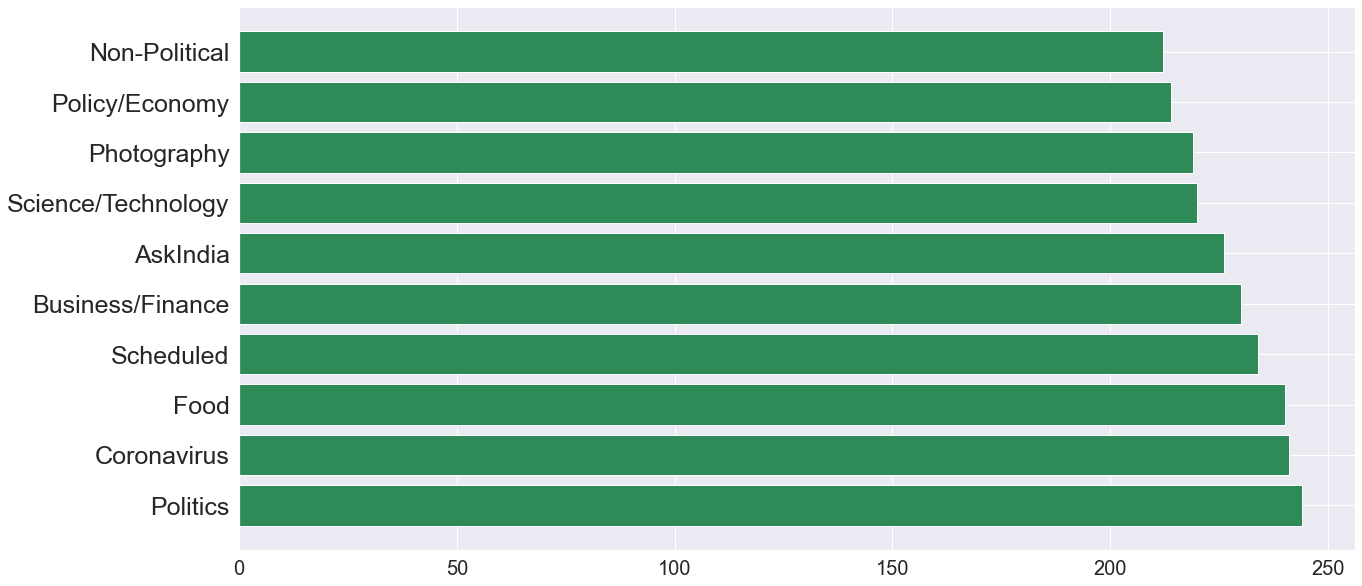

In [50]:
plt.figure(figsize=(20,10))
plt.yticks(fontsize=25)
plt.xticks(fontsize=20)
plt.barh(['Politics', 'Coronavirus', 'Food', 'Scheduled', 'Business/Finance',
       'AskIndia', 'Science/Technology', 'Photography', 'Policy/Economy',
       'Non-Political'],x.flair,color='seagreen')


## Average number of comments per post
### It is observed that "Politics" discussion threads have the most number of comments on average. This pretty much verifies the motive of such posts as politics is a controversial topic.

Flair                Average no. of comments 

Politics             64.11
Coronavirus          22.37
Food                 63.08
Scheduled            30.32
Business/Finance     30.68
AskIndia             40.94
Science/Technology   52.24
Photography          21.94
Policy/Economy       33.43
Non-Political        18.65


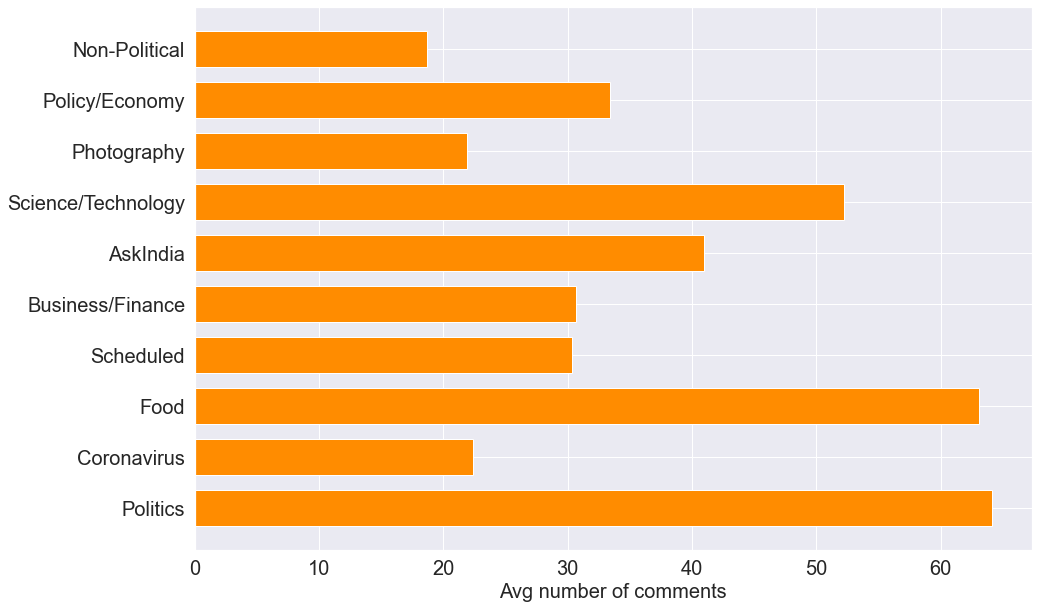

In [51]:
flairs = ['Politics', 'Coronavirus', 'Food', 'Scheduled', 'Business/Finance',
       'AskIndia', 'Science/Technology', 'Photography', 'Policy/Economy',
       'Non-Political']
          
mean_score = {}
for flair in flairs:
    mean_score[flair] = np.mean(data[data.flair == flair]['comms_num'])

print("{:<20} {:<15} \n".format('Flair', 'Average no. of comments'))
for key,val in mean_score.items():
    print("{:<20} {:.2f}".format(key, val)) 

plt.figure(figsize =(15,10))
plt.barh(flairs, mean_score.values(), color='darkorange', height=0.7)
plt.yticks(np.arange(len(mean_score)),list(mean_score.keys()), fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel("Avg number of comments", fontsize=20)
plt.show()

## Number of words in title
### This shows title is an important parameter and would affect our model

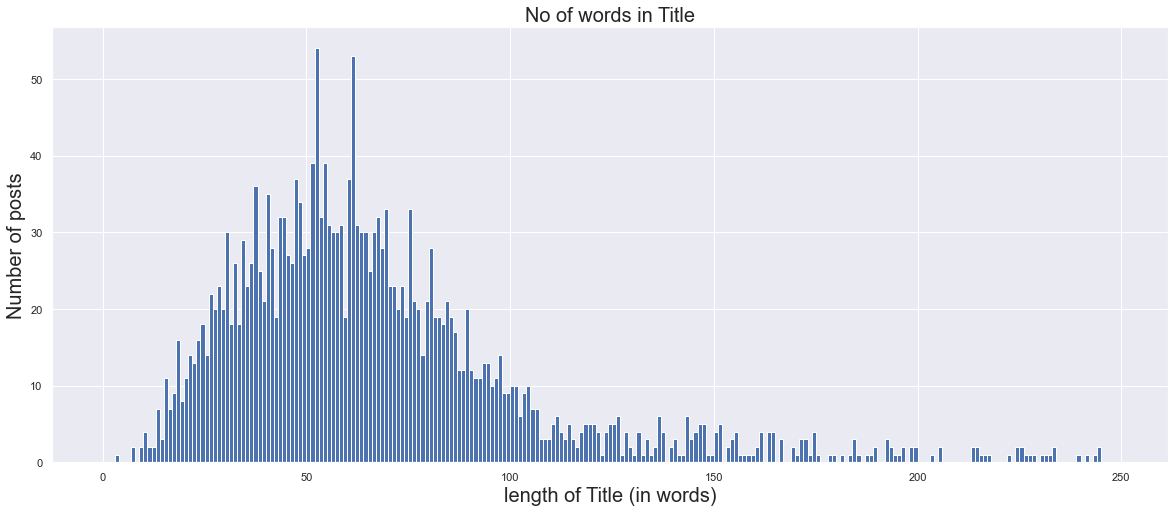

In [52]:
temp = data['title'].str.len()
temp.hist(bins = np.arange(0,250,1))
plt.title("No of words in Title",fontsize=20)
plt.xlabel("length of Title (in words)", fontsize=20)
plt.ylabel("Number of posts", fontsize=20)
plt.show()

## Number of words in body
### This means this is not an important factor as most of the post have 0 words

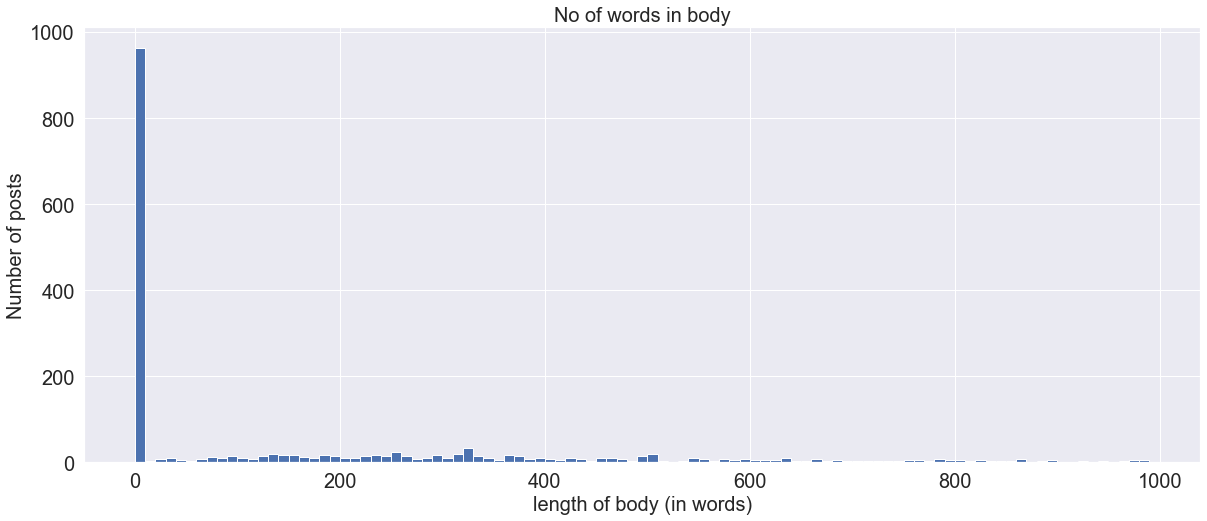

In [53]:
temp=data['body'].str.len()
temp.hist(bins=np.arange(0,1000,10))
plt.title("No of words in body",fontsize=20)
plt.xlabel("length of body (in words)", fontsize=20)
plt.ylabel("Number of posts", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

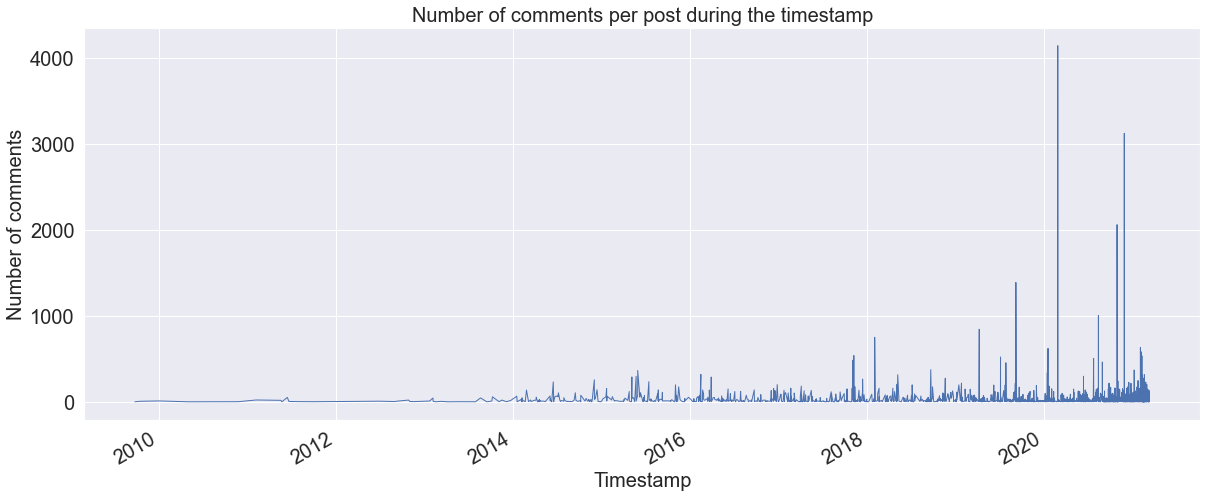

In [54]:
data2=data.set_index('timestamp')
data2['comms_num'].plot(linewidth=1,fontsize=20)
sns.set(rc={'figure.figsize':(20, 8)})
plt.title("Number of comments per post during the timestamp",fontsize=20)
plt.xlabel("Timestamp",fontsize=20)
plt.ylabel("Number of comments",fontsize=20)
plt.show()

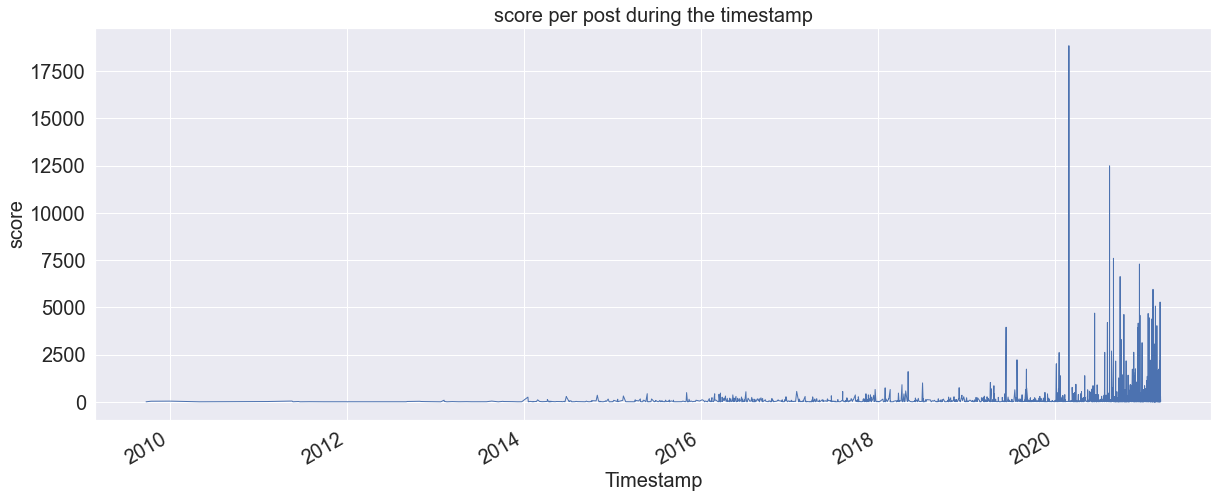

In [55]:
data2=data.set_index('timestamp')
data2['score'].plot(linewidth=1,fontsize=20)
sns.set(rc={'figure.figsize':(20, 8)})
plt.title("score per post during the timestamp",fontsize=20)
plt.xlabel("Timestamp",fontsize=20)
plt.ylabel("score",fontsize=20)
plt.show()

## Looking into the text
### WordClouds of three flairs (Coronavirus, Food, Politics) are generated to peek inside about the body texts.

In [56]:
text=data['title'][data.flair == 'Coronavirus']
text=str(list(text))

In [57]:
wordcloud = WordCloud().generate(text)

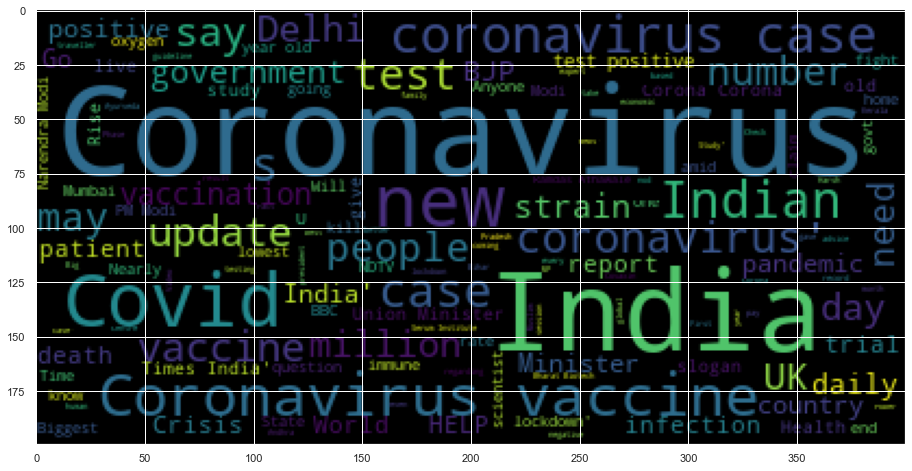

In [58]:
plt.imshow(wordcloud, interpolation="hermite")

In [59]:
text=data['title'][data.flair == 'Food']
text=str(list(text))

In [60]:
wordcloud = WordCloud().generate(text)

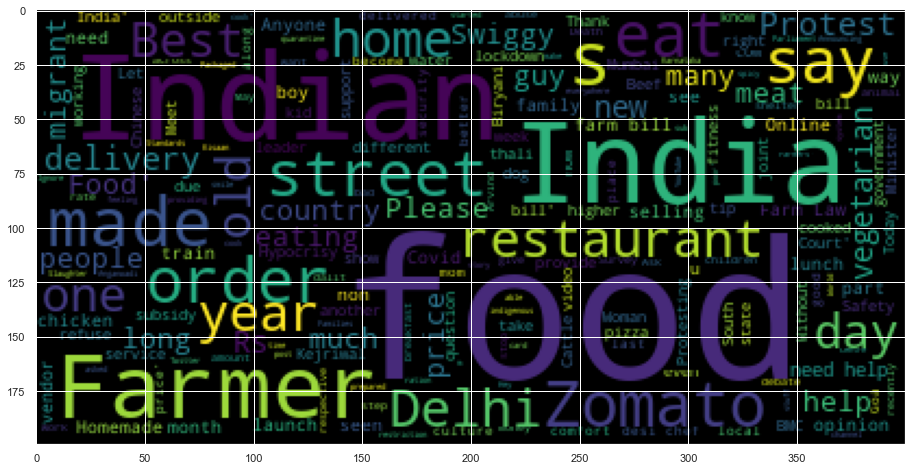

In [61]:
plt.imshow(wordcloud, interpolation="hermite")

In [62]:
text=data['title'][data.flair == 'Politics']
text=str(list(text))

In [63]:
wordcloud = WordCloud().generate(text)

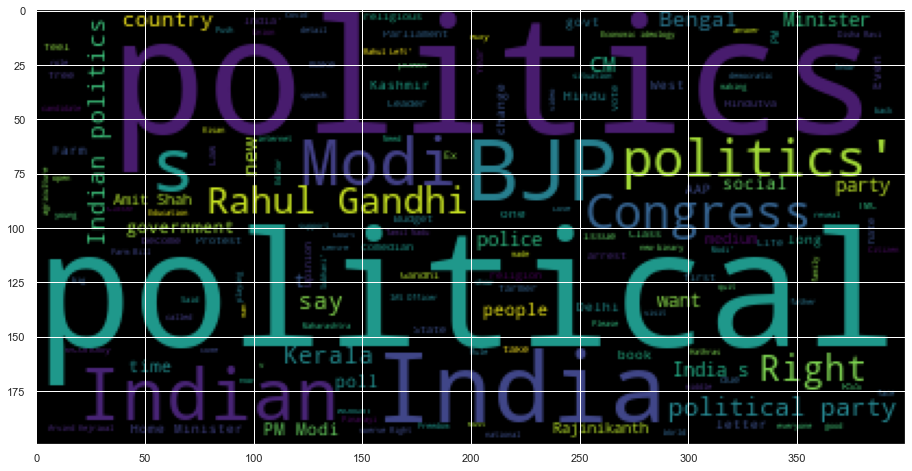

In [64]:
plt.imshow(wordcloud, interpolation="hermite")